# Moblie Statics

This notebook is made for analizing the data that was scraped by Group 7 and answering the questions that is asked.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/cleanned_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              2651 non-null   object 
 1   id                 2651 non-null   int64  
 2   model              2651 non-null   object 
 3   year               2651 non-null   int64  
 4   price              2651 non-null   float64
 5   battery            2651 non-null   float64
 6   weight             2651 non-null   float64
 7   sim                2651 non-null   object 
 8   size               2651 non-null   float64
 9   length_resolution  2651 non-null   int64  
 10  width_resolution   2651 non-null   int64  
 11  ppi                2651 non-null   float64
 12  ratio              2651 non-null   float64
 13  length             2651 non-null   float64
 14  width              2651 non-null   float64
 15  thickness          2651 non-null   float64
 16  core               2651 

## Analizing the network (2G , 3G , 4G)

Text(0.5, 1.0, 'Analizing the count of accurence')

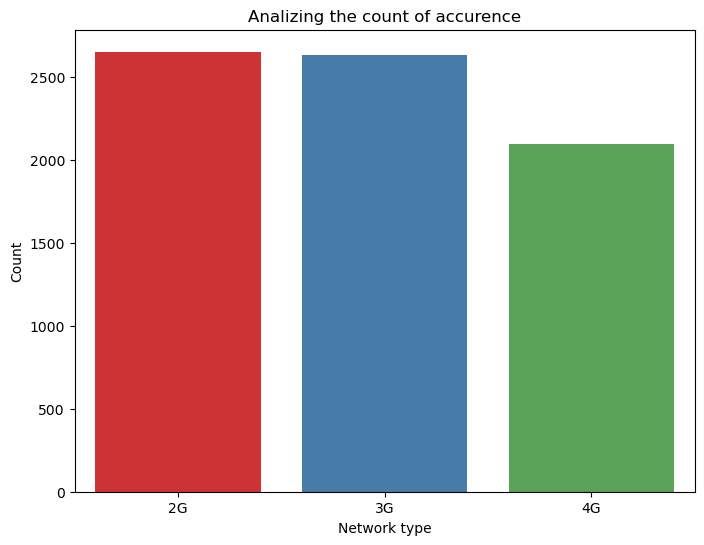

In [2]:
df_tmp = df[['2G' , '3G' , '4G']]

df_tmp = {'network' : ['2G' , '3G' , '4G'],
         'n' : [df_tmp['2G'].sum() , 
           df_tmp['3G'].sum() ,
           df_tmp['4G'].sum()]}

df_tmp = pd.DataFrame(df_tmp)
plt.figure(figsize=(8, 6))

sns.barplot(x='network' , y='n' , data=df_tmp , palette='Set1' )

plt.ylabel('Count')
plt.xlabel('Network type')

plt.title('Analizing the count of accurence')


## Correlation matrix between phones stats

Text(0.5, 1.0, 'Correlation Matrix')

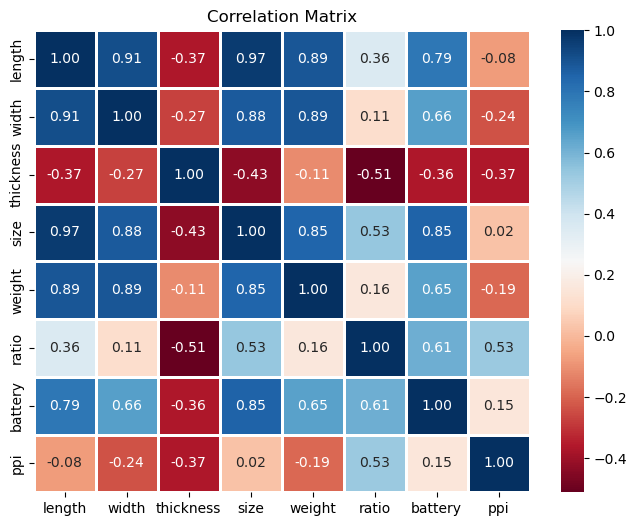

In [3]:
correlation_matrix = df[['length' , 'width' , 'thickness' , 'size' , 'weight' , 'ratio' , 'battery' , 'ppi']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix')



## Most used Sim card

In [4]:
df['sim'].unique()

array(['Nano-SIM', 'Micro-SIM', 'Mini-SIM'], dtype=object)

In [5]:
count_of_sims = df.groupby('sim').size()
df_tmp = pd.DataFrame(count_of_sims)
df_tmp.reset_index(inplace=True)
df_tmp

,sim,0
0,Micro-SIM,700
1,Mini-SIM,363
2,Nano-SIM,1588


Text(0.5, 1.0, 'Analizing the count of accurence')

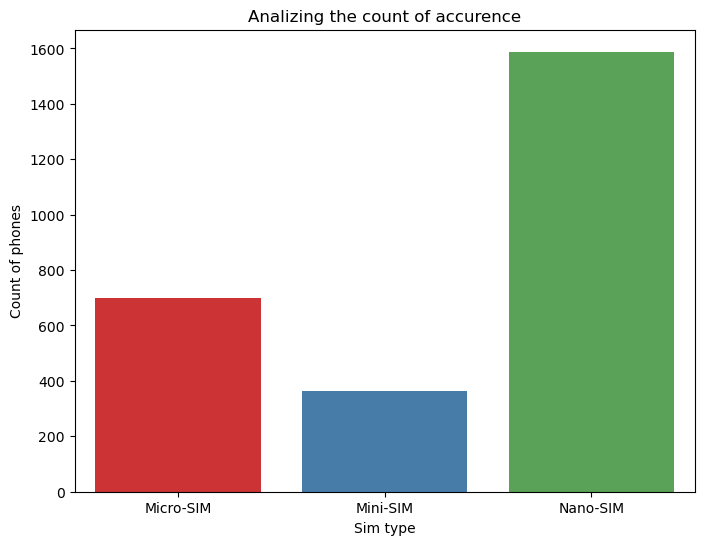

In [6]:
plt.figure(figsize=(8, 6))

sns.barplot(x='sim' , y=0 , data=df_tmp , palette='Set1' )

plt.ylabel('Count of phones')
plt.xlabel('Sim type')

plt.title('Analizing the count of accurence')

## Top 10 used Andriod version

In [7]:
df['os_type'].unique()

array(['Android', 'other', 'iOS'], dtype=object)

In [8]:
df_tmp = df[df['os_type'] == 'Android']
count_versions_of_android  = df_tmp.groupby('os_version').size()
count_versions_of_android = count_versions_of_android.sort_values(ascending=False)[:10]

df_tmp = pd.DataFrame(count_versions_of_android).reset_index()
df_tmp = df_tmp.sort_values(by=0)

Text(0.5, 1.0, 'Andriod version - Count')

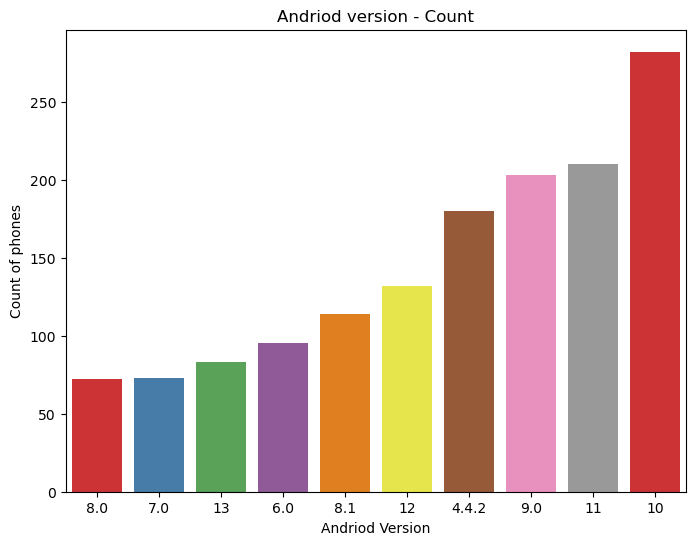

In [9]:
plt.figure(figsize=(8, 6))

sns.barplot(x='os_version' , y=0 , data=df_tmp , palette='Set1')

plt.ylabel('Count of phones')
plt.xlabel('Andriod Version')

plt.title('Andriod version - Count')

## Top 50 expensive phones

In [10]:
top_50_by_price = df.sort_values('price' , ascending=False)[:50]
top_50_grouped = top_50_by_price.groupby('os_type').size()
top_50_grouped

os_type
Android    36
iOS         5
other       9
dtype: int64

In [11]:
df_tmp = pd.DataFrame(top_50_grouped).reset_index()
df_tmp = df_tmp.sort_values(by=0)

([], [])

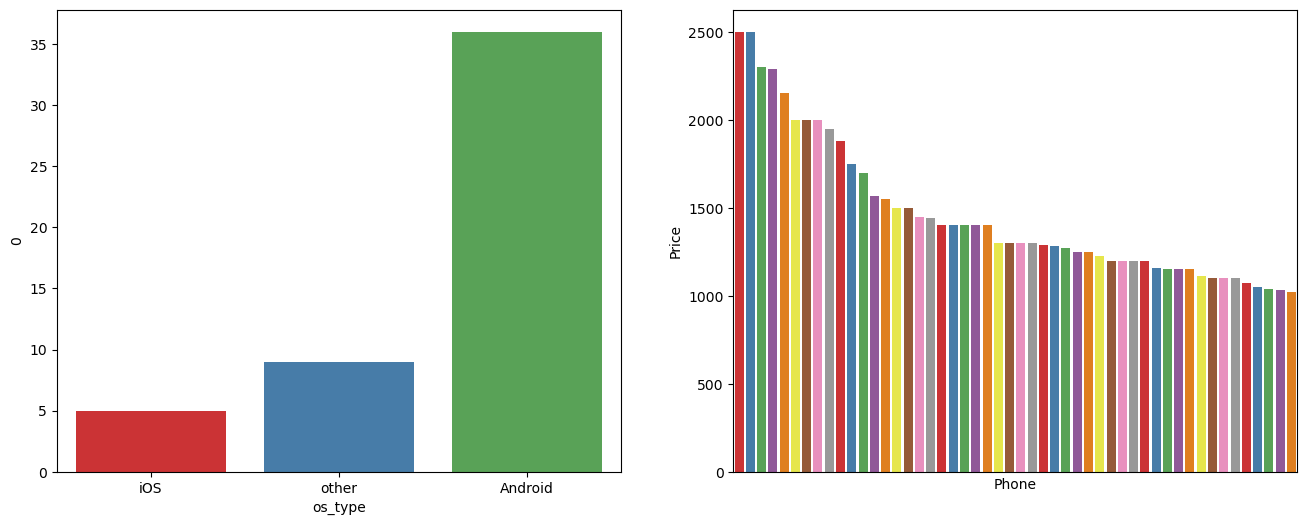

In [12]:
fig , axes = plt.subplots(1 , 2 , figsize=(16, 6))

sns.barplot(x='os_type' , y=0 , data=df_tmp , palette='Set1' , ax=axes[0])

sns.barplot(x='model' , y='price' , data=top_50_by_price[['model' , 'price']] , palette='Set1' , ax=axes[1])


plt.ylabel('Price')
plt.xlabel('Phone')

plt.xticks([])


## Phones distribution on brand

In [13]:
grouped_by_brand = df.groupby('brand').size()
grouped_by_brand


brand
Apple       73
Asus       125
BLU        149
HTC        173
Huawei     293
Infinix     62
LG         241
Lenovo     163
Nokia      114
Samsung    522
Sony       122
Xiaomi     282
ZTE        215
alcatel    117
dtype: int64

In [14]:
df_tmp = pd.DataFrame(grouped_by_brand).reset_index()
df_tmp = df_tmp.sort_values(by=0)

Text(0.5, 1.0, 'Count of phones by each brand')

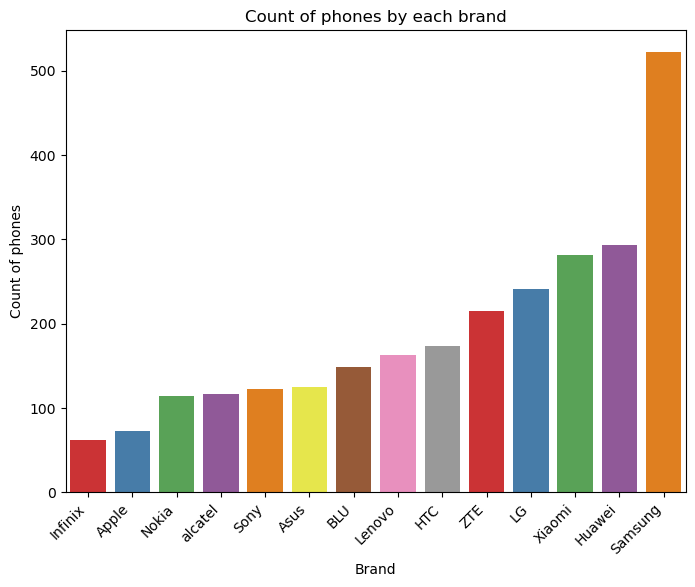

In [15]:
plt.figure(figsize=(8, 6))

sns.barplot(x='brand' , y=0 , data=df_tmp , palette='Set1')

plt.ylabel('Count of phones')
plt.xlabel('Brand')

plt.xticks(rotation=45, horizontalalignment='right')

plt.title('Count of phones by each brand')

## ppi density Scatter plots (Apple , Samsung , Xiaomi)

In [16]:
samsung_datas = df[df['brand'] == 'Samsung'][['year' , 'ppi']]
apple_datas = df[df['brand'] == 'Apple'][['year' , 'ppi']]
xiaomi_datas = df[df['brand'] == 'Xiaomi'][['year' , 'ppi']]


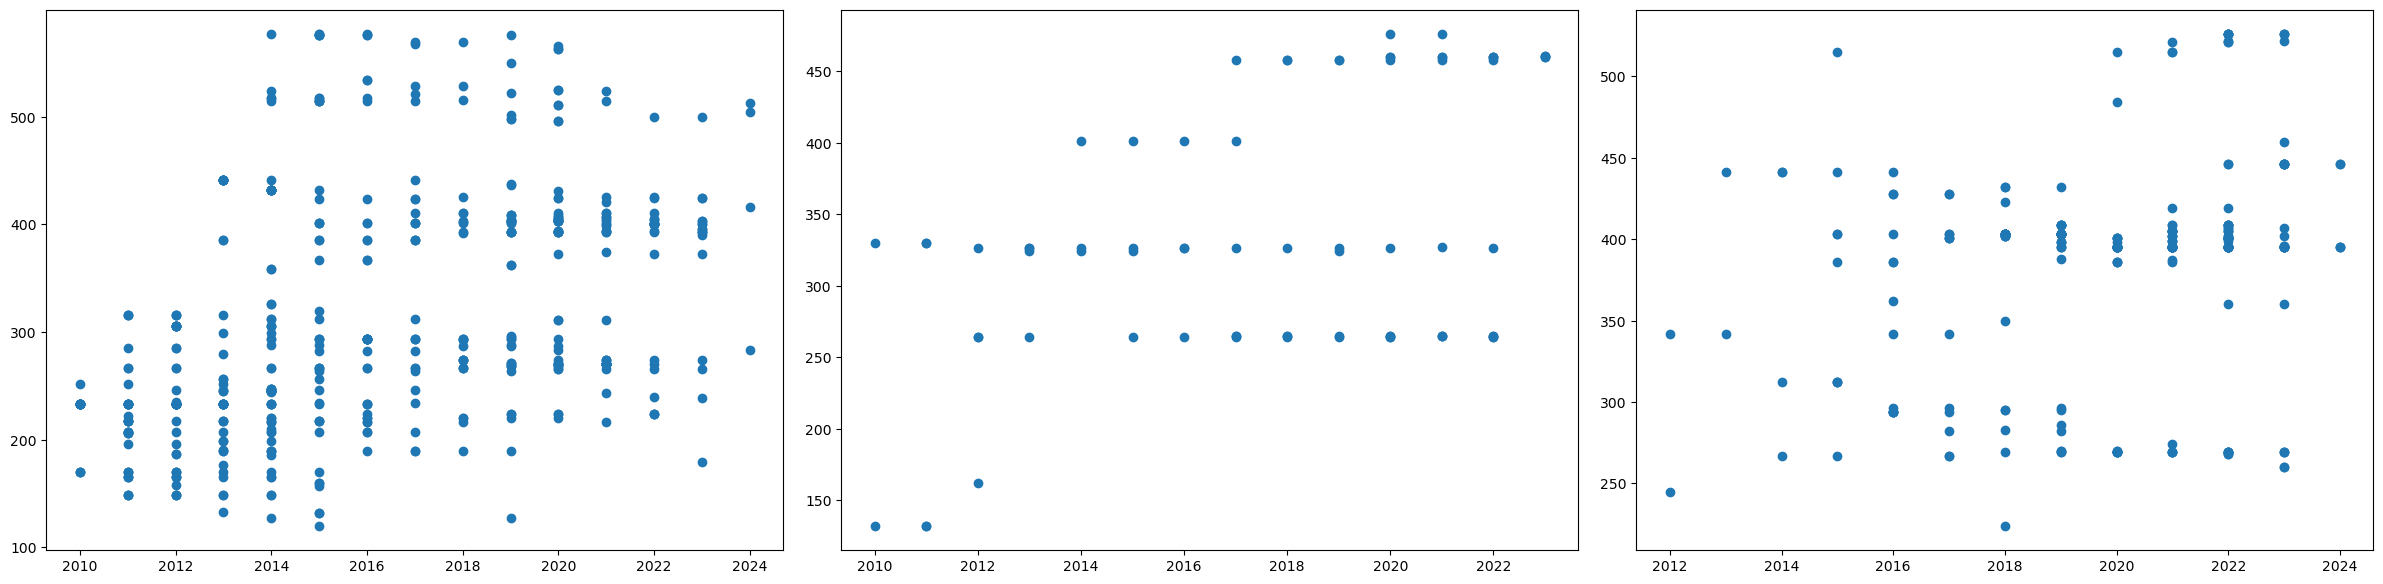

In [17]:
fig , axes = plt.subplots(1 , 3 , figsize=(24, 6))

fig.tight_layout()

axes[0].scatter(samsung_datas['year'] , samsung_datas['ppi'])

axes[1].scatter(apple_datas['year'] , apple_datas['ppi'])

axes[2].scatter(xiaomi_datas['year'] , xiaomi_datas['ppi'])

## Other stats Distribution plots

## Prediction on phone price (Apple , Samsung , Xiaomi , Nokia , Huawei)

c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

460.7607692307692

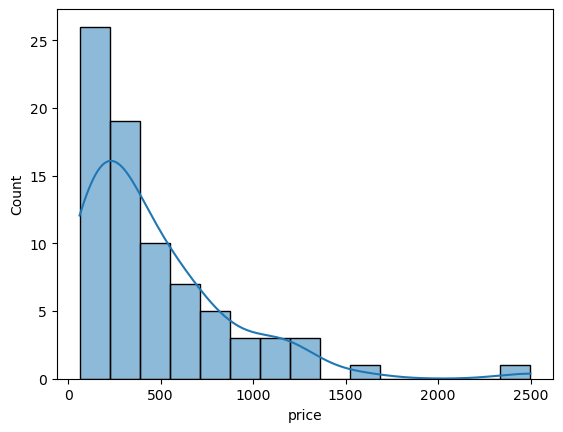

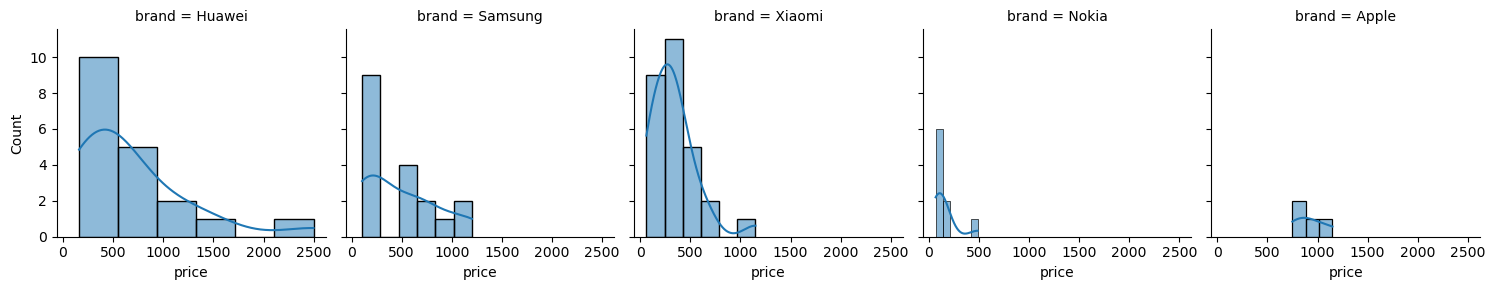

In [18]:
df_predict = df[['brand', 'price', 'year']]
accepted_brands = ['Apple', 'Samsung', 'Xiaomi', 'Nokia', 'Huawei']
df_predict = df_predict[(df_predict.brand.isin(accepted_brands)) & (df_predict.year == 2023)]
df_predict.drop('year', axis='columns', inplace=True)
# print(df_predict.groupby('brand').mean())

sns.histplot(df_predict['price'], kde=True, bins=15)

g = sns.FacetGrid(df_predict, col='brand')
g.map(sns.histplot,'price', kde=True)

df_predict['price'].mean()

c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

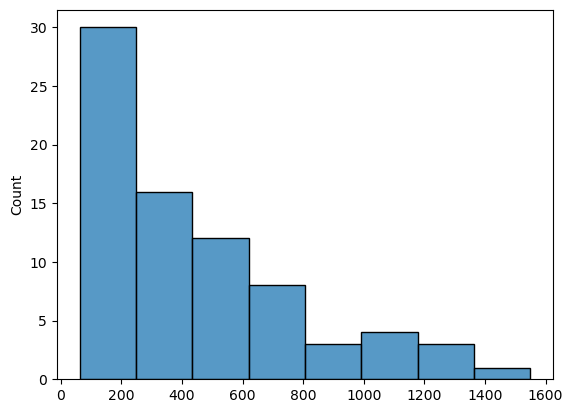

In [19]:
# removing outliers
prices = df_predict['price'].to_numpy()
prices = prices[np.abs(stats.zscore(prices)) < 3]
sns.histplot(prices)

c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

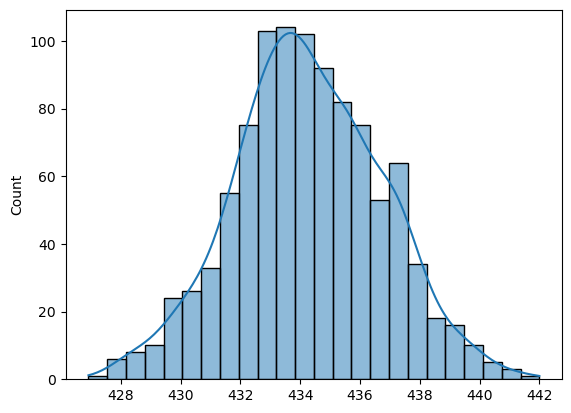

In [20]:
num_samples = 1000
sample_size = 20
samples_mean = []
np.random.seed(42)
for _ in range(num_samples):
    sample = np.random.choice(prices, (num_samples, sample_size),)
    samples_mean.append(np.mean(sample))

sns.histplot(samples_mean, kde=True)

In [21]:
stats.norm.interval(0.98, loc=np.mean(samples_mean), scale=np.std(samples_mean))

(428.52772446151874, 440.0056415464813)

In [22]:
df_allbrands_2023 = df[['price', 'year']]
df_allbrands_2023 = df_allbrands_2023[df_allbrands_2023['year'] == 2023]
df_allbrands_2023['price'].mean()

426.0268103448276

## Do different phones based on their sim cards have diffrent size?


c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

6.475850125944585 5.455514285714285 4.647658402203857


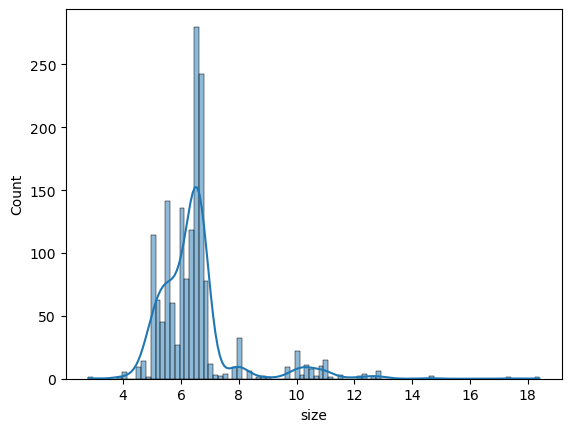

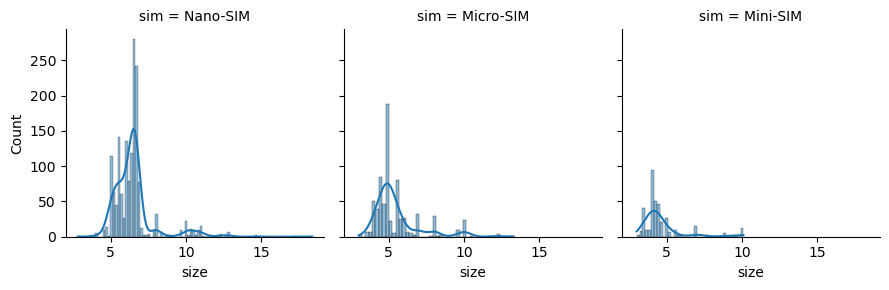

In [47]:
df_tmp = df.copy()
df_tmp = df_tmp[['sim', 'size']]

nano = df_tmp[df_tmp.sim == 'Nano-SIM']['size']
mini = df_tmp[df_tmp.sim == 'Mini-SIM']['size']
micro = df_tmp[df_tmp.sim == 'Micro-SIM']['size']

sns.histplot(nano, kde=True)

g = sns.FacetGrid(df_tmp, col='sim')
g.map(sns.histplot,'size',kde=True)
print(np.mean(nano), np.mean(micro), np.mean(mini))

In [51]:
_, p_value_nano_micro = stats.mannwhitneyu(nano, micro, alternative='less')
_, p_value_nano_mini = stats.mannwhitneyu(nano, mini, alternative='less')
_, p_value_micro_mini = stats.mannwhitneyu(micro, mini, alternative='less')

print(p_value_nano_micro)
print(p_value_nano_mini)
print(p_value_micro_mini)

# there is an impact nano > micro > mini
# but isn't that related to nano-sims being newer?
# anova? 

1.0
1.0
1.0


## Relation between size and resulotion

c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ppi', ylabel='Count'>

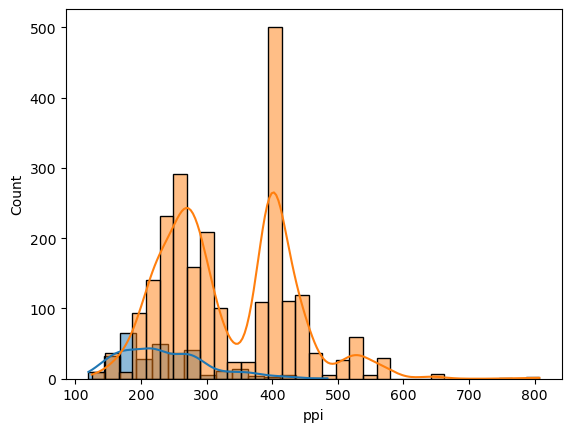

In [66]:
df_tmp = df.copy()
df_tmp = df_tmp[['ppi', 'size']]
small = df_tmp[df['size'] < 7.0]['ppi']
big = df_tmp[df['size'] >= 7.0]['ppi']

sns.histplot(big, kde=True)
sns.histplot(small, kde=True)

# the plot makes it obvious I believe
# but there is a u-test below

In [67]:
_, p_value = stats.mannwhitneyu(small, big, alternative='less')
p_value
# small > big

1.0

## Relation between OS and weight

c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\krsam\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weight', ylabel='Count'>

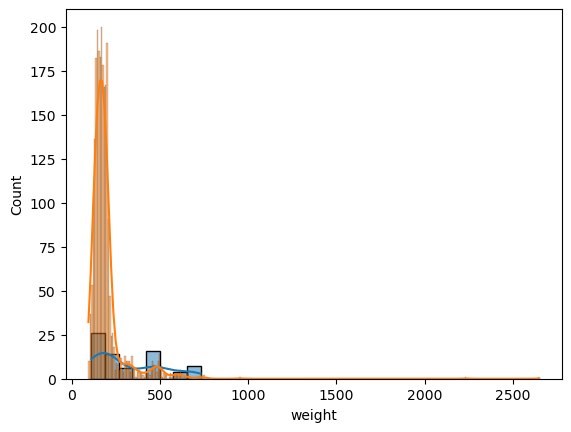

In [77]:
df_tmp = df.copy()
df_tmp = df_tmp[['os_type', 'weight']]

ios = df_tmp[df_tmp['os_type'] == 'iOS']['weight']
android = df_tmp[df_tmp['os_type'] == 'Android']['weight']

sns.histplot(ios, kde=True)
sns.histplot(android, kde=True)


In [79]:
_, p_value = stats.mannwhitneyu(ios, android, alternative='less')
p_value
# ios > android

0.9999999991748969

## Relation between screen size class and battery

## Relation between screen size class and phone price

## Do different phones based on their screen size class have diffrent weight?